<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/5%20-%20Pr%C3%A1ctica3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 3, predicción con regresión lineal.
##Abraham Cisneros Valladolid
###Dataset obtenido de: https://www.noaa.gov/



# 1 - Planteamento del problema

La predicción del clima es esencial en nuestras vidas diarias, desde la elección de la ropa hasta la planificación de actividades. Además, influye en la agricultura, la prevención de desastres, la economía y la salud pública. Permite tomar decisiones informadas, anticipar fenómenos climáticos extremos y abordar el cambio climático. La predicción del clima es una herramienta vital en la construcción de un futuro más seguro y sostenible.



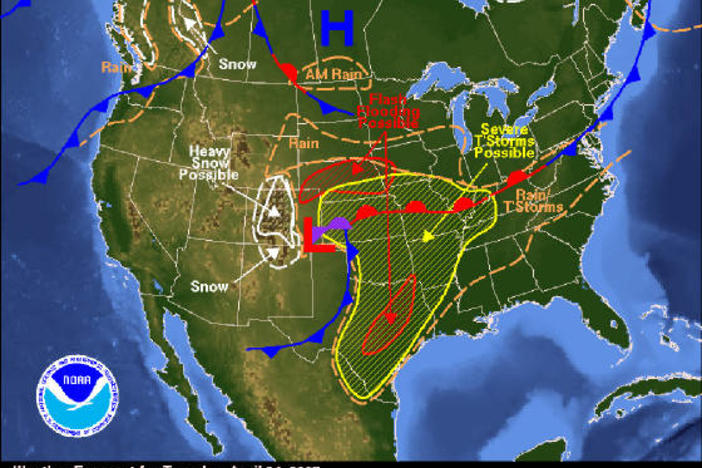

La predicción del clima es complicada debido a la naturaleza altamente compleja y dinámica del sistema climático. Implica la interacción de numerosas variables climáticas, influencias globales y patrones climáticos impredecibles. Además, pequeñas variaciones en las condiciones iniciales pueden tener un impacto significativo en las predicciones a largo plazo. Por lo tanto, la precisión en la predicción del clima es un desafío constante debido a esta complejidad inherente.

Los datos usados, son del aeropuerto internacional de Oakland:

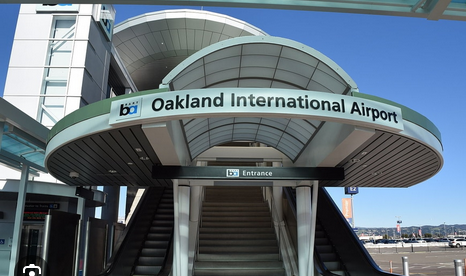

#2 - Obtención de datos


Importaremos el dataset con pandas para leerlo directamente de un CSV en drive.

In [ ]:
import pandas as pd
url="https://drive.google.com/file/d/1q8Z96FWqwSvX5S8_wUzfvsq90EswLf7c/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
weather = pd.read_csv(url, index_col = "DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-02-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
1960-02-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-02-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-02-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1960-02-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,5.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-17,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,5.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-18,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#3 - Limpieza de datos

Como podemos ver, tenemos 35 instancias en nuestra tabla de datos, determinar cuáles son los más útiles sin una etiqueta de clase puede resultar bastante complicado.

También
 al no ser un experto del tema, no puedo determinar cuáles atributos son relevantes, es por ello que acudimos a la documentación de NOAA
, en donde establecen 5 atributos núcleos.

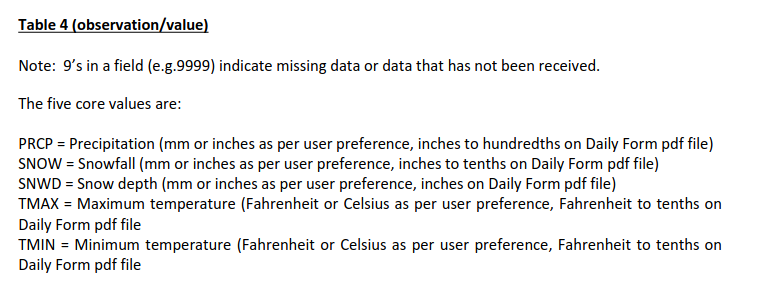

Para ello crearemos una copia con los 5 atributos mencionados.

In [ ]:
#Copiamos el dataframe
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

#Cambiamos los nombres de las columnas
core_weather.columns = ["Precipitación", "Nevado", "Profundidad_de_nieve", "Temperatura_maxima", "Temperatura_minima"]

#Veamos como quedo el dataframe
core_weather

,Precipitación,Nevado,Profundidad_de_nieve,Temperatura_maxima,Temperatura_minima
DATE,,,,,
1960-02-01,0.81,0.0,0.0,62.0,51.0
1960-02-02,0.00,0.0,0.0,59.0,43.0
1960-02-03,0.20,0.0,0.0,59.0,47.0
1960-02-04,0.16,0.0,0.0,60.0,42.0
1960-02-05,0.67,0.0,0.0,60.0,53.0
...,...,...,...,...,...
2023-03-16,0.00,NaN,NaN,59.0,42.0
2023-03-17,0.00,NaN,NaN,64.0,42.0
2023-03-18,0.01,NaN,NaN,66.0,44.0


##Verificación de valores nulos.
Para poder hacer un modelo de predicción es importante tener datos de calidad, por ello es importante verificar los valores nulos.

In [ ]:
#Dividr la cantidad de datos segun la suma de los valores nulos encontrados.
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precipitación           0.016295
Nevado                  0.341896
Profundidad_de_nieve    0.334706
Temperatura_maxima      0.000638
Temperatura_minima      0.000812
dtype: float64

Lo que podemos observar, es que los atributos de "Nevado" y "Profundidad de nieve" representan un aproximado del 70% de todos los valores nulos.

Veamos cuando valores reales tiene cada uno de los atributos.

In [ ]:
#Contar los valores del atributo nevado
core_weather["Nevado"].value_counts()

0.0    11348
1.0        1
Name: Nevado, dtype: int64

In [ ]:
#Contar los valores del atributo profunidad de la nieve
core_weather["Profundidad_de_nieve"].value_counts()

0.0    11473
Name: Profundidad_de_nieve, dtype: int64

Ya que solamente tenemos un valor en "Nevado" y ninguno en "Profundidad de nieve". Por ello, eliminaremos estos atributos.

In [ ]:
#Eliminación de las columnas
del core_weather["Nevado"]
del core_weather["Profundidad_de_nieve"]

##Columna Precipitación

Ahora, los valores nulos de la columna "Precipitación".

In [ ]:
#Contar los valores nulos del atributo
core_weather[pd.isnull(core_weather["Precipitación"])]

,Precipitación,Temperatura_maxima,Temperatura_minima
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [ ]:
#Contar cada unos de los valores de los atributos de precipitación
core_weather["Precipitación"].value_counts()

0.00    13989
0.01      443
0.02      202
0.03      123
0.04      104
        ...  
1.73        1
1.05        1
1.38        1
1.95        1
5.01        1
Name: Precipitación, Length: 178, dtype: int64

Rellenaremos los valores nulos con "0".

In [ ]:
#Rellenar los valores nulos con 0
core_weather["Precipitación"] = core_weather["Precipitación"].fillna(0)

In [ ]:
#Mostremos los primeros valores del DataFrame modificado
core_weather.head()

,Precipitación,Temperatura_maxima,Temperatura_minima
DATE,,,
1960-02-01,0.81,62.0,51.0
1960-02-02,0.00,59.0,43.0
1960-02-03,0.20,59.0,47.0
1960-02-04,0.16,60.0,42.0
1960-02-05,0.67,60.0,53.0


##Columna Temperatura minima

Haremos lo mismo, con los atributos de temperatura mínima, ya que también tenemos valores nulos.

In [ ]:
#Mostremos los valores que tienen la columna "Temperatura minima"
core_weather[pd.isnull(core_weather["Temperatura_minima"])]

,Precipitación,Temperatura_maxima,Temperatura_minima
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


En este caso, no son tantos valores faltantes, podemos usar "Forward Fill" para rellenar los datos faltantes.

In [ ]:
#Rellenamos con forward fill
core_weather = core_weather.fillna(method="ffill")

Verificamos que no falten datos en nuestros atributos.

In [ ]:
#Verificamos los datos faltantes
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precipitación         0.0
Temperatura_maxima    0.0
Temperatura_minima    0.0
dtype: float64

Finalmente, ajustemos el index a un tipo de fecha para poder operar en ella de una manera más sencilla.

In [ ]:
#Observamos el tipo de datos.
core_weather.index

Index(['1960-02-01', '1960-02-02', '1960-02-03', '1960-02-04', '1960-02-05',
       '1960-02-06', '1960-02-07', '1960-02-08', '1960-02-09', '1960-02-10',
       ...
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
       '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20'],
      dtype='object', name='DATE', length=17245)

In [ ]:
#Cambiamos el tipo de datos
core_weather.index = pd.to_datetime(core_weather.index)

#Observemos ahora el index y su tipo de datos
core_weather.index

DatetimeIndex(['1960-02-01', '1960-02-02', '1960-02-03', '1960-02-04',
               '1960-02-05', '1960-02-06', '1960-02-07', '1960-02-08',
               '1960-02-09', '1960-02-10',
               ...
               '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
               '2023-03-19', '2023-03-20'],
              dtype='datetime64[ns]', name='DATE', length=17245, freq=None)

Incluso podemos ordenar los datos por años, lo cual nos puede ser sumamente útil para hacer un análisis de los datos.

In [ ]:
#Mostrar los datos agrupado por años.
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=17245)

#4 - Exploración de datos.

In [ ]:
#Mostrar los primeros 5 datos del DataFrame
core_weather.head()

,Precipitación,Temperatura_maxima,Temperatura_minima
DATE,,,
1960-02-01,0.81,62.0,51.0
1960-02-02,0.00,59.0,43.0
1960-02-03,0.20,59.0,47.0
1960-02-04,0.16,60.0,42.0
1960-02-05,0.67,60.0,53.0


##Hagamos una grafica de los datos de temperatura maxima y minima.


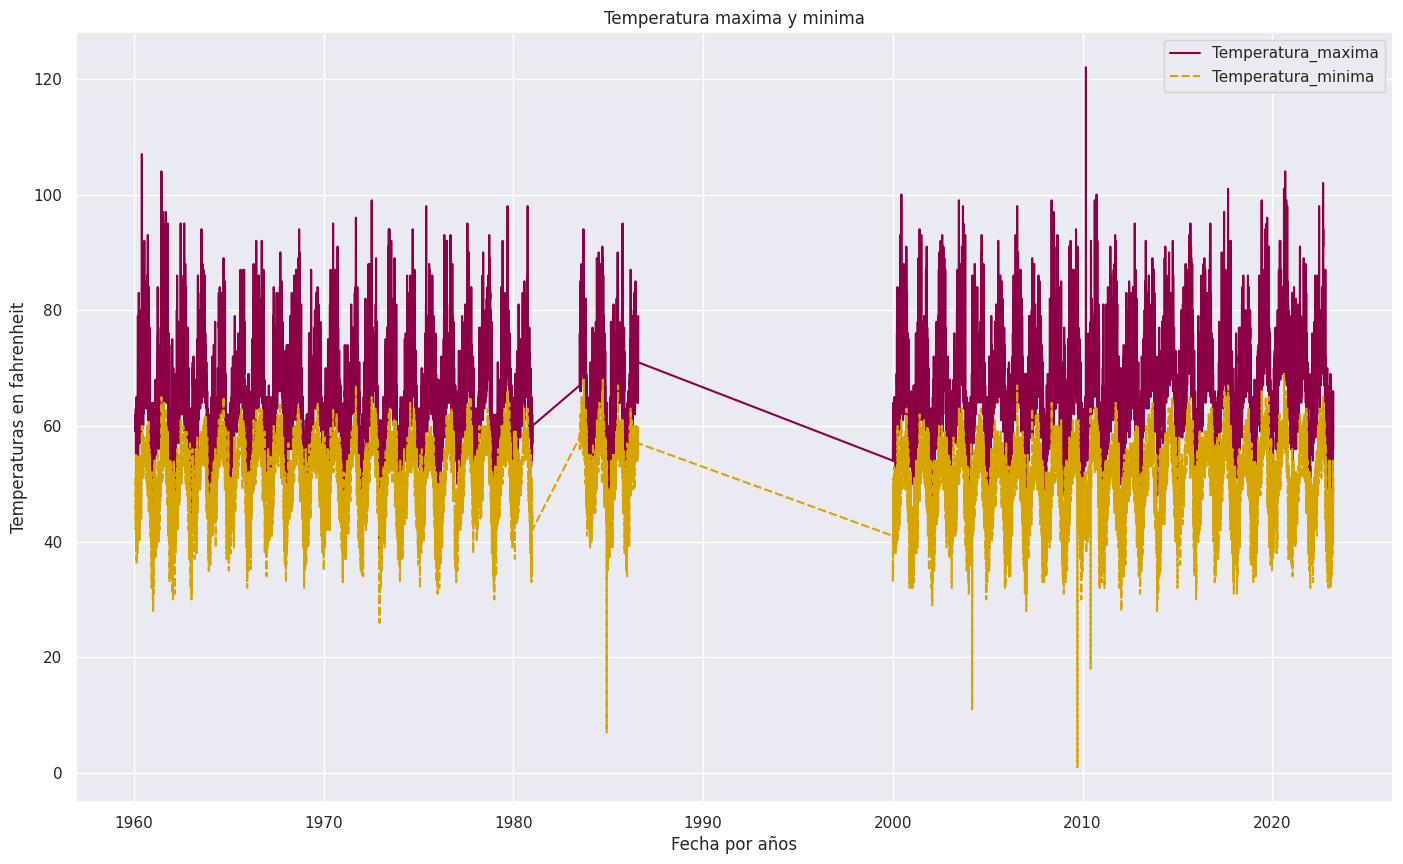

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Establecemos un tema
sns.set(style="darkgrid")
palette = ["#8d0045", "#d6a500"]
sns.set_palette(palette)


#Establecemos el tamaño de los datos
plt.figure(figsize=(17, 10))

#Gráficamos los valores de las temperaturas
sns.lineplot(data=core_weather[["Temperatura_maxima", "Temperatura_minima"]])

#Establecemos etiquetas y leyendas
plt.title("Temperatura maxima y minima")
plt.xlabel("Fecha por años")
plt.ylabel("Temperaturas en fahrenheit")
plt.legend()

#Mostramos el grafico
plt.show()

Podemos ver claramente que hacen faltan datos en muchos años, hagamos una exploración de estos datos por año.

In [ ]:
#Mostrar los datos filtrados por año
core_weather.index.year.value_counts().sort_index()

1960    335
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023     79
Name: DATE, dtype: int64

Al parecer los datos de la estación metereológica no registro los datos de estos años.

##Veamos los valores de las precipitaciones.

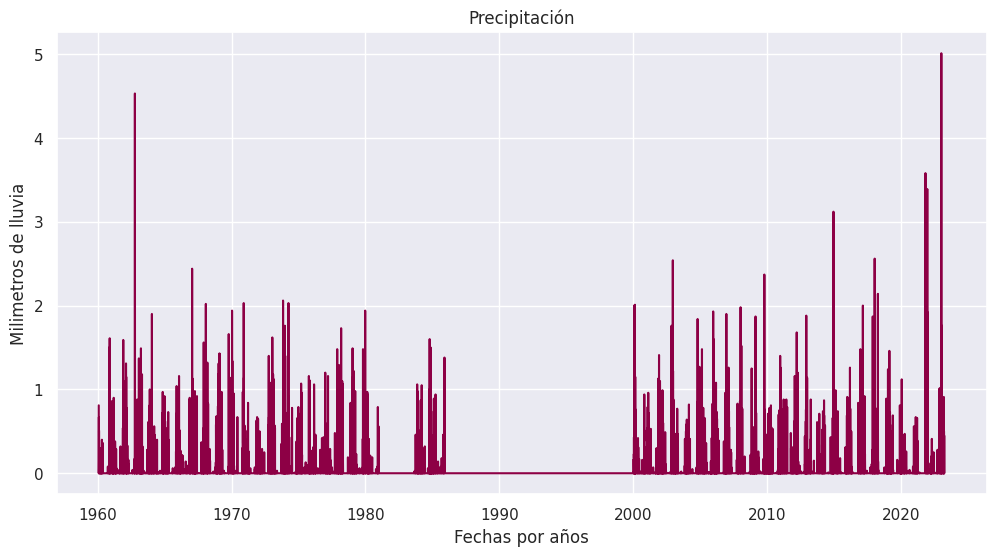

In [ ]:
#Graficar la precipitación

#Tamaño de la figura
plt.figure(figsize=(12,6))

#Establecmos la linea
sns.lineplot(data=core_weather["Precipitación"])

#Agregamos las leyendas
plt.title("Precipitación")
plt.xlabel("Fechas por años")
plt.ylabel("Milimetros de lluvia")

#Mostramos el grafico
plt.show()

#5 - Modelo de regresión

   
* Las variables independientes (más de una) deberán ser continuas.
* La variable dependiente deberá ser continua.

Para poder tener una variable a la cual predecir necesitamos crear un atributo que sea nuestro "objetivo".

In [ ]:
#Creamos una nueva columna objetivo
core_weather["objetivo"] = core_weather.shift(-1)["Temperatura_maxima"]
core_weather.tail()

,Precipitación,Temperatura_maxima,Temperatura_minima,objetivo
DATE,,,,
2023-03-16,0.00,59.0,42.0,64.0
2023-03-17,0.00,64.0,42.0,66.0
2023-03-18,0.01,66.0,44.0,58.0
2023-03-19,0.45,58.0,51.0,56.0
2023-03-20,0.00,56.0,48.0,NaN


Debido al "shift
" que aplicamos, el último valor quedo como nulo, por lo que es importante corregirlo.

In [ ]:
#Le damos un valor diferente a nulo a la ultima instancia
core_weather = core_weather.iloc[:-1,:].copy()
core_weather.tail()

,Precipitación,Temperatura_maxima,Temperatura_minima,objetivo
DATE,,,,
2023-03-15,0.00,59.0,40.0,59.0
2023-03-16,0.00,59.0,42.0,64.0
2023-03-17,0.00,64.0,42.0,66.0
2023-03-18,0.01,66.0,44.0,58.0
2023-03-19,0.45,58.0,51.0,56.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Generamos el modelo.

<Figure size 1700x600 with 0 Axes>

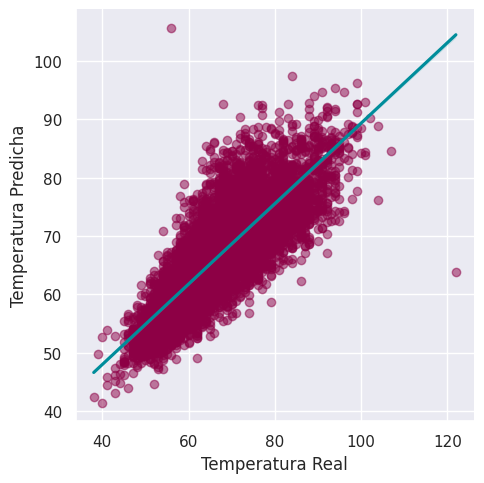

In [ ]:
#Variables independientes
X = core_weather[["Precipitación", "Temperatura_maxima", "Temperatura_minima"]]

#Variable dependiente
y = core_weather["objetivo"]

#Creación del modelo
model = LinearRegression()
model.fit(X, y)

#Realiza predicción para los mismos datos de entrada
y_pred = model.predict(X)

#Creamos un nuevo
data = pd.DataFrame({'Temperatura Real': y, 'Temperatura Predicha': y_pred})

#Tamaño de la figura
plt.figure(figsize=(17,6))

# Crea un gráfico de regresión lineal con Seaborn
sns.lmplot(x='Temperatura Real', y='Temperatura Predicha', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': '#008d9b'})

#Muestra el grafico
plt.show()

Lo que podemos ver aquí es un scatter plot de las temperaturas reales contra temperaturas predichas por el modelo, al mismo tiempo la línea de regresión.

Podemos observar unos cuantos datos que fueron mal clasificados, pero fueron días específicos donde el clima vario mucho.

También podemos hacer un train, test split para hacer una predicción dados una entrada.

In [ ]:
#División de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Evaluación del modelo
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 22.59517918782315
R2: 0.6865267605623352


* El Mean Squared Error (MSE) es una métrica que evalúa la precisión de un modelo de regresión lineal calculando el promedio de los errores cuadráticos entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

* El Coeficiente de Determinación (R^2) es una métrica que mide la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. R^2 varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna variabilidad y 1 indica que el modelo explica toda la variabilidad. Un R^2 más cercano a 1 indica un mejor rendimiento del modelo.

##Predicción de datos

In [ ]:
core_weather.iloc[10000:10500]

,Precipitación,Temperatura_maxima,Temperatura_minima,objetivo
DATE,,,,
2003-05-19,0.00,80.0,48.0,80.0
2003-05-20,0.00,80.0,51.0,74.0
2003-05-21,0.00,74.0,52.0,67.0
2003-05-22,0.00,67.0,52.0,69.0
2003-05-23,0.00,69.0,53.0,62.0
...,...,...,...,...
2004-09-25,0.00,69.0,53.0,78.0
2004-09-26,0.01,78.0,51.0,66.0
2004-09-27,0.00,66.0,52.0,69.0


Agreguemos los datos de la primera instancia, para ver como se comporta nuestro modelo.

In [ ]:
#Datos nuevos para predecir
nuevos_datos = pd.DataFrame({'Precipitación': [0.81], 'Temperatura_maxima': [62.0], 'Temperatura_minima': [51.0]})
prediccion = model.predict(nuevos_datos)
print(f'Predicción de temperatura máxima: {prediccion[0]}')

Predicción de temperatura máxima: 61.58559429233784


La temperatura real era 62, bastante cerca o quizás muy sobre ajustado.

In [ ]:
#Datos nuevos para predecir
nuevos_datos = pd.DataFrame({'Precipitación': [0.01], 'Temperatura_maxima': [78.0], 'Temperatura_minima': [51.0]})
prediccion = model.predict(nuevos_datos)
print(f'Predicción de temperatura máxima: {prediccion[0]}')

Predicción de temperatura máxima: 74.80886616945934


La temperatura real era 66, no tan alejado, por lo que nuestro modelo no esta totalmente sobre ajustado.





In [ ]:
#Datos nuevos para predecir
nuevos_datos = pd.DataFrame({'Precipitación': [5.7], 'Temperatura_maxima': [66.0], 'Temperatura_minima': [55.0]})
prediccion = model.predict(nuevos_datos)
print(f'Predicción de temperatura máxima: {prediccion[0]}')

Predicción de temperatura máxima: 55.159725203636924


Y unos valores inventados para ver como se comporta.

#6 - Conclusión

Logros del Proyecto:

    Predicciones de Temperatura: El proyecto logró desarrollar un modelo de regresión lineal que puede predecir la temperatura utilizando datos históricos de precipitación, temperatura máxima y temperatura mínima. Estas predicciones pueden ser útiles para diversas aplicaciones, como la planificación agrícola, la gestión de energía y la toma de decisiones en sectores relacionados con el clima.

    Entendimiento de las Variables: El proyecto permitió comprender mejor la relación entre las variables meteorológicas y la temperatura. Se observó cómo la precipitación y las temperaturas máximas y mínimas pueden influir en la temperatura actual, lo que proporciona información valiosa sobre los patrones climáticos locales.

    Uso de Regresión Lineal: Se aplicó con éxito el concepto de regresión lineal para modelar esta relación entre las variables meteorológicas y la temperatura. Este método es una técnica de aprendizaje automático fundamental que puede ser útil en una variedad de aplicaciones más allá de la predicción del clima.

Dificultades y Desafíos:

    Complejidad del Clima: El clima es un sistema extremadamente complejo con múltiples factores que influyen en las condiciones meteorológicas. La regresión lineal, por sí sola, puede no capturar todas las relaciones no lineales y complejidades en los datos climáticos.

    Recolección de Datos Precisos: La calidad de los datos meteorológicos históricos es esencial para el éxito del proyecto. La falta de datos precisos o la presencia de datos faltantes pueden dificultar la construcción de un modelo confiable.

    Sensibilidad a las Variables: La elección de las variables predictoras es crítica en la regresión lineal. La inclusión o exclusión de ciertas variables puede afectar significativamente la calidad de las predicciones.

Lecciones Aprendidas:

    Importancia de la Preparación de Datos: La preparación adecuada de los datos, incluida la limpieza, la codificación de variables y la gestión de valores faltantes, es esencial para el éxito de cualquier proyecto de análisis de datos, incluido el pronóstico del clima.

    Limitaciones de la Regresión Lineal: Se aprendió que la regresión lineal es una técnica poderosa, pero tiene sus limitaciones en la modelización de relaciones complejas en los datos. En algunos casos, puede ser necesario explorar modelos más avanzados para obtener predicciones más precisas.

    Validación y Evaluación: La validación adecuada del modelo y la evaluación de su rendimiento son cruciales. Métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2) proporcionan información valiosa sobre la calidad del modelo.

    Interpretación de Resultados: La interpretación de los coeficientes de regresión es importante para comprender cómo cada variable afecta a la temperatura. Esto puede ser útil para tomar decisiones basadas en datos relacionados con el clima.



En general, un proyecto de predicción de clima usando regresión lineal puede aportar información útil y aprendizaje significativo sobre el comportamiento del clima. Sin embargo, es importante considerar las limitaciones de la regresión lineal y la complejidad del sistema climático y por esto mismo no es una predicción de tan alta fiabilidad.